## Project: Employee Sentiment Analysis

Goal: Analyze employee emails to determine overall sentiment, identify key topics, and provide actionable insights for management.
Requirements:
- Sentiment classification (positive, negative, neutral)
- Topic modeling to find main discussion themes
- Recommendations based on findings
-->

### Data Loading and Processing

In [2]:
import pandas as pd
import re

df = pd.read_csv('test(in).csv')
df.head(10)

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",10/23/2011,eric.bass@enron.com
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,4/5/2010,kayne.coulter@enron.com
7,Forgot the Attachment,Please print attachment and make sure that e:m...,4/21/2010,patti.thompson@enron.com
8,Garvin Brown - AXIA Sr. Power Scheduler,Please advise me of your interest in Garvin's ...,2/7/2010,sally.beck@enron.com
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2/6/2010,kayne.coulter@enron.com


In [3]:
# cleaning the data
def clean_text(text):
    # lowercase the text
    text = str(text).lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

# create a new column with cleaned text
df['clean_body'] = df['body'].apply(clean_text)
df[['Subject', 'clean_body']].head(10)

,Subject,clean_body
0,EnronOptions Update!,enronoptions announcement we have updated the ...
1,(No Subject),marc unfortunately today is not going to work ...
2,Phone Screen Interview - Shannon L. Burnham,when wednesday june 06 2001 1000 am1100 am gmt...
3,RE: My new work email,we were thinking papasitos we can meet somewhe...
4,Bet,since you never gave me the 20 for the last ti...
5,RE: Favor,sure just call me the bank that delivers we wi...
6,MG Inventory Summaries,inventory summaries for both mgl and mgmcc as ...
7,Forgot the Attachment,please print attachment and make sure that ema...
8,Garvin Brown - AXIA Sr. Power Scheduler,please advise me of your interest in garvins e...
9,More Dallas ASE Information,the start time for tuesday morning has been ch...


### Task 1: Sentiment Labeling
- Classify each email as positive, negative, or neutral based on its content.
- Using HuggingFace Transformers (LLM-based sentiment analysis method)

In [4]:
# Sentimaent labeling via HuggingFace Transformers
%pip install transformers -q
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis")

def hf_sentiment(text):
    result = sentiment_model(text[:512])[0]  # Limit to 512 characters for performance
    label = result['label']
    score = result['score']
    
    # the threshold for neutral sentiment
    # if score is less than 0.6, classify as neutral
    # otherwise classify as positive or negative based on label
    if score < 0.6:
        return 'neutral'
    elif label == 'POSITIVE':
        return 'positive'
    elif label == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_body'].apply(hf_sentiment)
df[['Subject', 'sentiment']].head(10)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\24991\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


C:\Users\24991\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,Subject,sentiment
0,EnronOptions Update!,negative
1,(No Subject),negative
2,Phone Screen Interview - Shannon L. Burnham,negative
3,RE: My new work email,positive
4,Bet,positive
5,RE: Favor,negative
6,MG Inventory Summaries,negative
7,Forgot the Attachment,positive
8,Garvin Brown - AXIA Sr. Power Scheduler,positive
9,More Dallas ASE Information,negative


### Task 2: Exploratory Data Analysis (EDA)

**Objective:**  
Analyze the structure, sentiment distribution, and trends in the dataset.

**Requirements:**  
- Examine overall data structure (record count, types, missing values).  
- Analyze distribution of sentiment labels.  
- Explore time-based trends.  
- Identify patterns or anomalies related to employee engagement.  
- Include relevant visualizations (charts, tables, etc.).

**Note:**  
The EDA should support later tasks by highlighting key insights and directions for further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Subject     2191 non-null   object
 1   body        2191 non-null   object
 2   date        2191 non-null   object
 3   from        2191 non-null   object
 4   clean_body  2191 non-null   object
 5   sentiment   2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None
Subject       0
body          0
date          0
from          0
clean_body    0
sentiment     0
dtype: int64
sentiment
negative    1304
positive     834
neutral       53
Name: count, dtype: int64


<Axes: title={'center': 'Yearly Sentiment Trends'}, xlabel='date'>

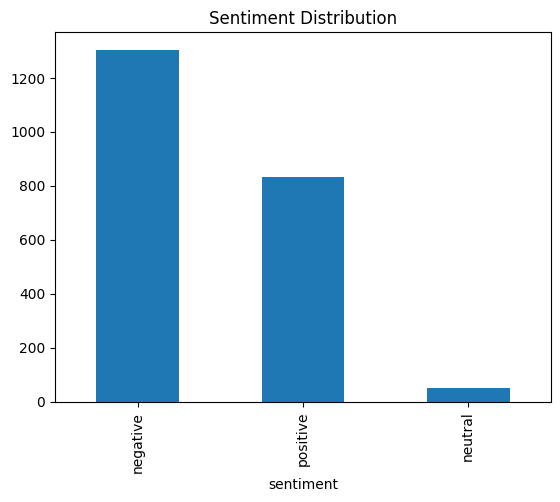

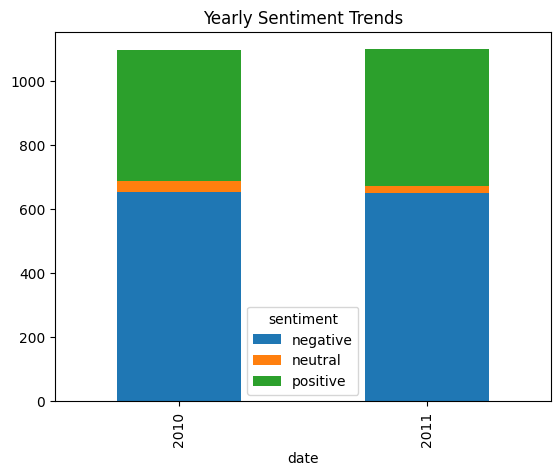

In [5]:
# Data Structure and missing values check
print(df.info())
print(df.isnull().sum())

# animent distribution analysis
print(df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

# Trend analysis over time
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.groupby([df['date'].dt.year, 'sentiment']).size().unstack().plot(kind='bar', stacked=True, title='Yearly Sentiment Trends')

C:\Users\24991\AppData\Local\Temp\ipykernel_22332\75313863.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["date"].dt.to_period("M").dt.to_timestamp()


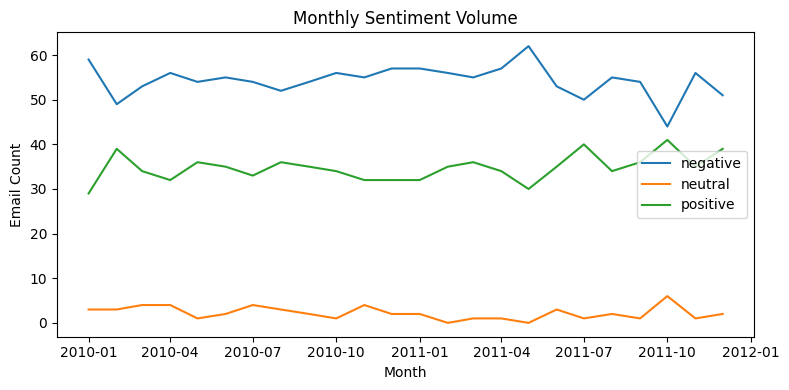

In [6]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce", utc=True)

# Create a new column for year-month
df["year_month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# Group by year_month and sentiment, then count occurrences
monthly = (df
           .groupby(["year_month", "sentiment"])
           .size()
           .unstack(fill_value=0)
           .sort_index())

# Plotting the monthly sentiment volume
plt.figure(figsize=(8, 4))
for col in monthly.columns:
    plt.plot(monthly.index, monthly[col], label=col)   # 不指定颜色
plt.title("Monthly Sentiment Volume")
plt.xlabel("Month")
plt.ylabel("Email Count")
plt.legend()
plt.tight_layout()
plt.show()

### Summary

1. **Data Structure:**
   - The dataset contains 2,191 email records with no missing values across the key columns: `Subject`, `body`, `date`, `from`, `clean_body`, and `sentiment`.
   - All columns are of object type, with the `date` column to be parsed into datetime for time-based analysis.

2. **Sentiment Distribution:**
   - The majority of messages are labeled as **Negative** (1,304), followed by **Positive** (834), and a small proportion of **Neutral** (53).
   - This indicates a general negative sentiment trend across employee communication, which may warrant further attention.

3. **Time Trends:**
   - Sentiment trends over years (2010 and 2011) appear relatively stable.
   - Both years show a consistent pattern: negative messages are most common, followed by positive, with neutral remaining a minority.
   - There is no significant year-over-year shift in sentiment balance.

4. **Engagement Insight:**
   - The low number of neutral messages may be due to the confidence threshold applied during sentiment labeling with the LLM.
   - Certain employees, such as the one who sent 284 emails, may be key to understanding sentiment patterns and should be investigated further in future tasks.

### Task 3: Employee Score Calculation

**Objective:**  
Compute a monthly sentiment score for each employee based on their messages.

**Requirements:**
- Assign a sentiment score to each message:
  - Positive: +1  
  - Negative: –1  
  - Neutral: 0
- Aggregate these scores on a **monthly basis** for each employee.
- Ensure the score resets at the beginning of each month.
- Document the method used to group by month and calculate cumulative scores.

**Note:**  
Accurate monthly aggregation is important, as the scores will be used in later tasks such as employee ranking and flight risk detection.

In [7]:
# set up sentiment score mapping
score_map = {'positive': 1, 'negative': -1, 'neutral': 0}
df['sentiment_score'] = df['sentiment'].map(score_map)

# convert date to year-month format
df['year_month'] = df['date'].dt.to_period('M') # transform to year-month format

# group by 'from' and 'year_month' to calculate monthly sentiment scores
monthly_scores = df.groupby(['from', 'year_month'])['sentiment_score'].sum().reset_index()

# showcase of the first person's monthly sentiment scores (two years)
print(monthly_scores.head(24))

                           from year_month  sentiment_score
0   bobette.riner@ipgdirect.com    2010-01               -2
1   bobette.riner@ipgdirect.com    2010-02                1
2   bobette.riner@ipgdirect.com    2010-03               -4
3   bobette.riner@ipgdirect.com    2010-04               -4
4   bobette.riner@ipgdirect.com    2010-05                2
5   bobette.riner@ipgdirect.com    2010-06                1
6   bobette.riner@ipgdirect.com    2010-07               -2
7   bobette.riner@ipgdirect.com    2010-08               -5
8   bobette.riner@ipgdirect.com    2010-09               -1
9   bobette.riner@ipgdirect.com    2010-10                2
10  bobette.riner@ipgdirect.com    2010-11               -2
11  bobette.riner@ipgdirect.com    2010-12                0
12  bobette.riner@ipgdirect.com    2011-01               -8
13  bobette.riner@ipgdirect.com    2011-02               -3
14  bobette.riner@ipgdirect.com    2011-03               -2
15  bobette.riner@ipgdirect.com    2011-

C:\Users\24991\AppData\Local\Temp\ipykernel_22332\3665501258.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M') # transform to year-month format


### Summary
Each message is assigned a sentiment score: positive=+1, negative=-1, neutral=0.
Monthly scores are calculated for each employee using pandas groupby on 'from' and 'year_month'.
Scores reset at the start of each month.
This aggregation supports further analysis such as employee ranking and flight risk detection.

### Task 4: Employee Ranking

**Objective:**  
Generate ranked lists of employees based on their monthly sentiment scores.

**Requirements:**  
- Create two separate rankings for each month:
  - Top Three Positive Employees: Employees with the highest sentiment scores.
  - Top Three Negative Employees: Employees with the lowest (most negative) sentiment scores.
- Sort rankings by score (descending), then alphabetically.
- Rankings must be derived from the monthly sentiment scores calculated in Task 3.
- Present the rankings clearly using tables or charts.

**Note:**  
Your report should briefly explain how the rankings were determined.

In [8]:
# Function to get top N employees based on sentiment scores
def get_top_employees(df, score_col, group_cols, top_n=3, ascending=False):
    # sort: by group columns and score
    # sort month first, then sort by score
    df_sorted = df.sort_values(group_cols + [score_col, 'from'], ascending=[True, ascending, True])
    # get top N per group
    return df_sorted.groupby(group_cols).head(top_n)

# top 3 positive employees each month
top_positive = get_top_employees(monthly_scores, 'sentiment_score', ['year_month'], top_n=3, ascending=False)
print("Top 3 Positive Employees Each Month:")
print(top_positive)

# top 3 negative employees each month
top_negative = get_top_employees(monthly_scores, 'sentiment_score', ['year_month'], top_n=3, ascending=True)
print("Top 3 Negative Employees Each Month:")
print(top_negative)

Top 3 Positive Employees Each Month:
                            from year_month  sentiment_score
96       johnny.palmer@enron.com    2010-01                0
24        don.baughman@enron.com    2010-01               -1
72         john.arnold@enron.com    2010-01               -1
25        don.baughman@enron.com    2010-02                5
1    bobette.riner@ipgdirect.com    2010-02                1
..                           ...        ...              ...
70           eric.bass@enron.com    2011-11                1
118      johnny.palmer@enron.com    2011-11                1
95         john.arnold@enron.com    2011-12                1
119      johnny.palmer@enron.com    2011-12                1
239         sally.beck@enron.com    2011-12                1

[72 rows x 3 columns]
Top 3 Negative Employees Each Month:
                            from year_month  sentiment_score
144      lydia.delgado@enron.com    2010-01               -7
120      kayne.coulter@enron.com    2010-01      

In [9]:
# best and worst employees based on top 3 appearances

# best employee (most times in Top 3 Positive)
best_employee = top_positive['from'].value_counts().idxmax()
best_count = top_positive['from'].value_counts().max()
print(f"Best Employee (most times in Top 3 Positive): {best_employee} ({best_count} times)")

# worst employee (most times in Top 3 Negative)
worst_employee = top_negative['from'].value_counts().idxmax()
worst_count = top_negative['from'].value_counts().max()
print(f"Worst Employee (most times in Top 3 Negative): {worst_employee} ({worst_count} times)")

Best Employee (most times in Top 3 Positive): johnny.palmer@enron.com (14 times)
Worst Employee (most times in Top 3 Negative): patti.thompson@enron.com (12 times)


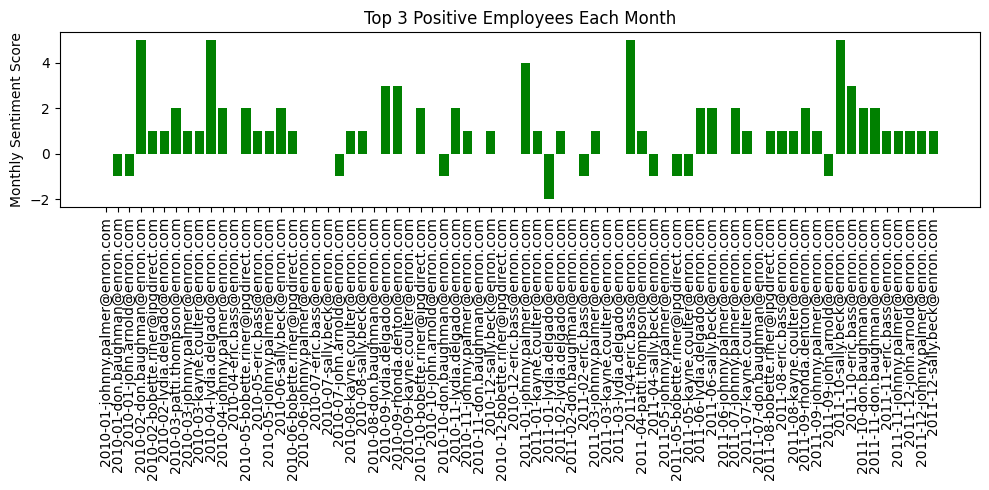

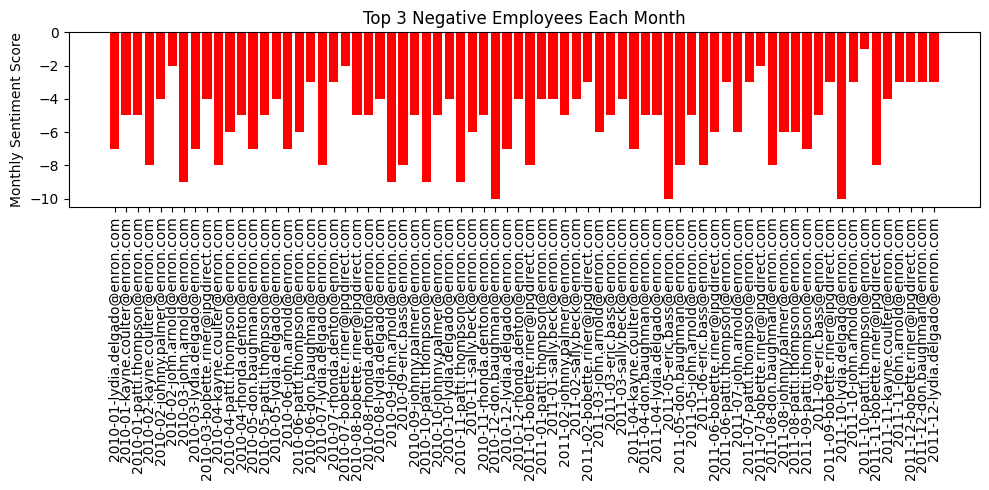

In [19]:
# Employee Ranking Visualization
import matplotlib.pyplot as plt

# Top 3 Positive Employees Each Month
plt.figure(figsize=(10, 5))
for month, group in top_positive.groupby('year_month'):
    plt.bar([f"{month}-{name}" for name in group['from']], group['sentiment_score'], color='green')
plt.title("Top 3 Positive Employees Each Month")
plt.ylabel("Monthly Sentiment Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 3 Negative Employees Each Month
plt.figure(figsize=(10, 5))
for month, group in top_negative.groupby('year_month'):
    plt.bar([f"{month}-{name}" for name in group['from']], group['sentiment_score'], color='red')
plt.title("Top 3 Negative Employees Each Month")
plt.ylabel("Monthly Sentiment Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Summary
- For each month, the top three employees with the highest and lowest sentiment scores were identified based on their aggregated monthly results. Rankings were determined by sorting employees first by sentiment score (descending for positive, ascending for negative) and then alphabetically. 

- Over all months, the employee who appeared most frequently in the top three positive rankings was recognized as the “best employee,” while the one most frequently in the top three negative rankings was identified as the “worst employee.” This approach highlights key contributors to positive and negative sentiment within the organization and helps management focus on both high performers and potential risk areas.

- From the bar-chart visualizations, I noticed that positive scores rarely rise above +5 and cluster closer to zero, whereas negative scores can drop below −10. This agian may represent the labeling model being to strict. In several months, the same employees dominate both extremes, suggesting localized factors that can sharply boost—or depress—overall team morale.

### Task 5: Flight Risk Identification

**Objective:**  
Identify employees who are at risk of leaving based on their message behavior.

**Requirements:**  
- An employee is considered a flight risk if they have sent **4 or more negative messages within any rolling 30-day window**.  
- The 30-day period is a **rolling window**, not limited by calendar months.  
- Extract a list of employees who meet this criterion.  
- Ensure the flagging logic is robust and consistently applied.

**Note:**  
This task helps identify potential disengaged employees and supports proactive employee retention strategies.

In [10]:
import pandas as pd

# Identify flight risk employees based on negative sentiment emails
negative_df = df[df['sentiment'] == 'negative'].copy()
negative_df['date'] = pd.to_datetime(negative_df['date'], errors='coerce')

# sort by date and group by employee
# Use rolling window to count negative emails in any 30-day period
flight_risk_employees = set()
for name, group in negative_df.groupby('from'):
    group = group.sort_values('date')
    # count negative emails in rolling 30-day windows
    for i in range(len(group)):
        window_start = group.iloc[i]['date']
        window_end = window_start + pd.Timedelta(days=30)
        count_in_window = group[(group['date'] >= window_start) & (group['date'] < window_end)].shape[0]
        if count_in_window >= 4:
            flight_risk_employees.add(name)
            break  # no need to check further for this employee

print("Flight Risk Employees (>=4 negative emails in any rolling 30-day window):")
print(list(flight_risk_employees))

Flight Risk Employees (>=4 negative emails in any rolling 30-day window):
['kayne.coulter@enron.com', 'rhonda.denton@enron.com', 'john.arnold@enron.com', 'bobette.riner@ipgdirect.com', 'johnny.palmer@enron.com', 'lydia.delgado@enron.com', 'patti.thompson@enron.com', 'sally.beck@enron.com', 'don.baughman@enron.com', 'eric.bass@enron.com']


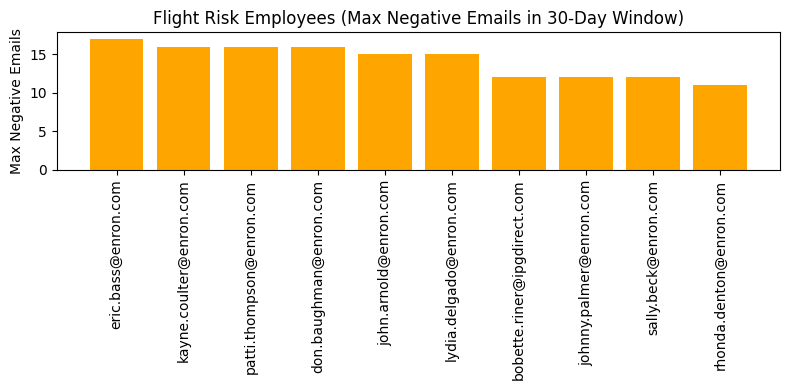

In [17]:
# Visualization of flight risk analysis
flight_risk_counts = []
for name in flight_risk_employees:
    group = negative_df[negative_df['from'] == name].sort_values('date')
    max_count = 0
    for i in range(len(group)):
        window_start = group.iloc[i]['date']
        window_end = window_start + pd.Timedelta(days=30)
        count_in_window = group[(group['date'] >= window_start) & (group['date'] < window_end)].shape[0]
        max_count = max(max_count, count_in_window)
    flight_risk_counts.append((name, max_count))
flight_risk_counts.sort(key=lambda x: x[1], reverse=True)
names, counts = zip(*flight_risk_counts)
plt.figure(figsize=(8, 4))
plt.bar(names, counts, color='orange')
plt.title("Flight Risk Employees (Max Negative Emails in 30-Day Window)")
plt.ylabel("Max Negative Emails")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Summary

Under the current design, covering a two-year period, every employee who ever sent more than 4 negative emails within any single month was included in the flight risk list.

**Analysis:**  
- The 30-day window may be too long, capturing periods of concentrated negative sentiment.
- Some months may have unusually high negative email activity.
- The LLM-based sentiment model currently using may classify messages as negative too strictly.
- The threshold (4 emails) may be too low for this dataset.

**Adjustment Suggestions:**  
- Increase the threshold (e.g., 5 or 6 emails per 30 days).
- Shorten the rolling window (e.g., 14 or 21 days).
- Refine the sentiment classification criteria.
- Combine with other metrics for more targeted risk identification.

**Conclusion:**  
- With current settings, the flight risk list includes all employee email addresses in the database, indicating that the criteria may need to be adjusted for more meaningful results.

### Task 6: Predictive Modeling

**Objective:**

Develop a linear regression model to analyze sentiment trends and predict sentiment scores using a variety of independent variables that may influence sentiment scores.

**Select independent variables (features)** you believe may influence sentiment scores.  
You are encouraged to use:

**Requirements:**
- Select appropriate features from the dataset that may influence sentiment scores (e.g., message frequency in a month, message length, average message length, word count).
- Split the data into training and testing sets to evaluate model performance.
- Develop a linear regression model and validate its effectiveness using suitable metrics.
- Interpret the model results and discuss the significance of the findings.

**Notes:**

The predictive modeling task is aimed at exploring how sentiment trends can be quantified and forecasted. Ensure that your model evaluation is clearly documented.

#### Feature Engineering
For Task 6, the following features are selected to predict each employee's monthly sentiment score:

- **Average Word Count for the Month (`avg_word_count`)**:  
  The average number of words per email sent by the employee in the current month. This reflects the typical length and detail of their communications.

- **Score of Last Month (`last_month_score`)**:  
  The employee's sentiment score from the previous month. This helps capture temporal trends and continuity in sentiment.

- **Message Frequency in a Month (`message_count`)**:  
  The total number of emails sent by the employee in the current month. Higher frequency may indicate engagement or stress.

- **Score of the Team (`team_score`)**:  
  The sum of sentiment scores for all employees in the same month. This provides context about the overall team atmosphere and environment.

These features together help quantify both individual behavior and team context, supporting more accurate prediction of monthly sentiment trends.

In [12]:
# words coount for each email
df['word_count'] = df['clean_body'].apply(lambda x: len(str(x).split()))

# monthly features
monthly_features = df.groupby(['from', 'year_month']).agg(
    avg_word_count=('word_count', 'mean'), # avg word count for current month
    message_count=('body', 'count'), # number of emails sent by the employee in the current month
    sentiment_score=('sentiment_score', 'sum') # total sentiment score for the current month
).reset_index()

# last month sentiment score
monthly_features = monthly_features.sort_values(['from', 'year_month'])
monthly_features['last_month_score'] = monthly_features.groupby('from')['sentiment_score'].shift(1)

# team score calculation
team_score = monthly_features.groupby('year_month')['sentiment_score'].sum().rename('team_score').reset_index()
monthly_features = monthly_features.merge(team_score, on='year_month', how='left')

# drop first month as it has no last month score
model_data = monthly_features.dropna(subset=['avg_word_count', 'last_month_score', 'message_count', 'team_score', 'sentiment_score'])

print(model_data.head())

                          from year_month  avg_word_count  message_count  \
1  bobette.riner@ipgdirect.com    2010-02       42.571429             14   
2  bobette.riner@ipgdirect.com    2010-03       43.181818             11   
3  bobette.riner@ipgdirect.com    2010-04       31.833333              6   
4  bobette.riner@ipgdirect.com    2010-05       30.000000              4   
5  bobette.riner@ipgdirect.com    2010-06       26.400000              5   

   sentiment_score  last_month_score  team_score  
1                1              -2.0         -10  
2               -4               1.0         -19  
3               -4              -4.0         -24  
4                2              -4.0         -18  
5                1               2.0         -20  


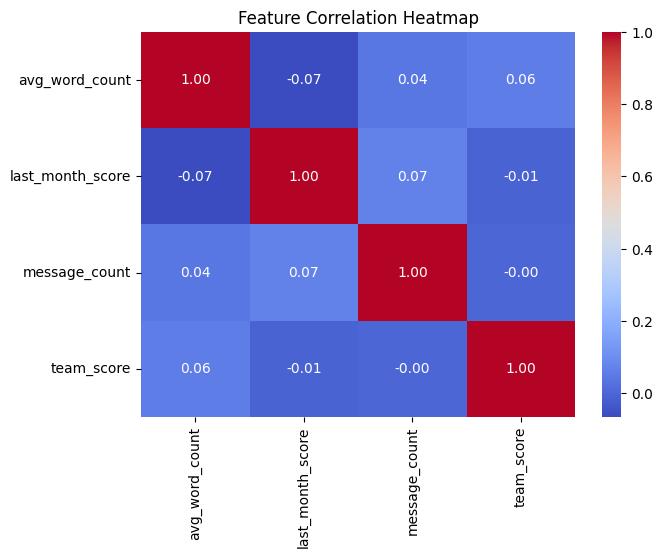

In [ ]:
import seaborn as sns

# correlation analysis: visualize the correlation between features
corr = model_data[['avg_word_count', 'last_month_score', 'message_count', 'team_score']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

The correlations between the selected features are all very low, indicating that these variables are largely independent of each other and can be treated as separate inputs for modeling.

### Modeling
To predict each employee's monthly sentiment score, we will use a linear regression model. The modeling and evaluation process includes the following steps:

1. **Train-Test Split:**  
   The dataset will be divided into a training set and a testing set. The training set is used to fit the model, while the testing set is used to evaluate its predictive performance on unseen data.

2. **Model Training:**  
   We will train a linear regression model using the selected features (`avg_word_count`, `last_month_score`, `message_count`, `team_score`) to predict the monthly sentiment score.

3. **Model Evaluation:**  
   After training, we will assess the model's effectiveness using suitable metrics such as R-squared (coefficient of determination) and Mean Squared Error (MSE). These metrics help us understand how well the model explains the variance in sentiment scores and its prediction accuracy.

4. **Interpretation:**  
   Finally, we will interpret the model results, discuss the significance of each feature, and provide insights into the factors influencing employee sentiment trends.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# 1. Train-Test Split
X = model_data[['avg_word_count', 'last_month_score', 'message_count', 'team_score']]
y = model_data['sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# 4. Interpretation: Feature Importance
feature_importance = pd.Series(lr.coef_, index=X.columns)
print("Feature coefficients (importance):")
print(feature_importance)

R-squared: 0.108
Mean Squared Error: 7.467
Feature coefficients (importance):
avg_word_count     -0.030539
last_month_score   -0.024885
message_count      -0.212755
team_score          0.128925
dtype: float64


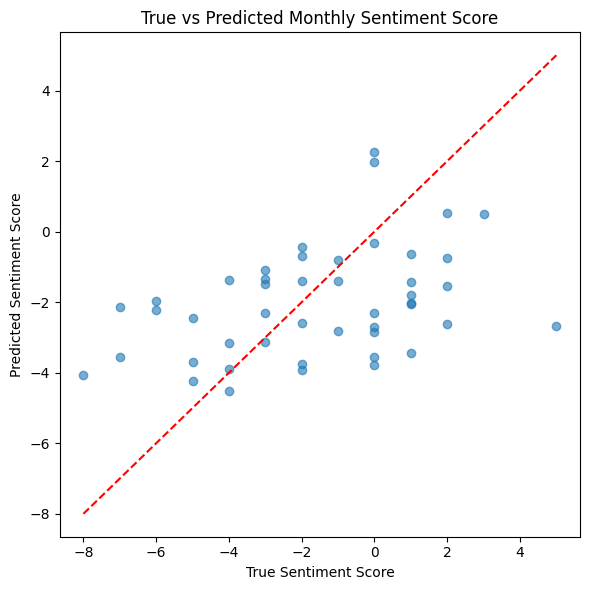

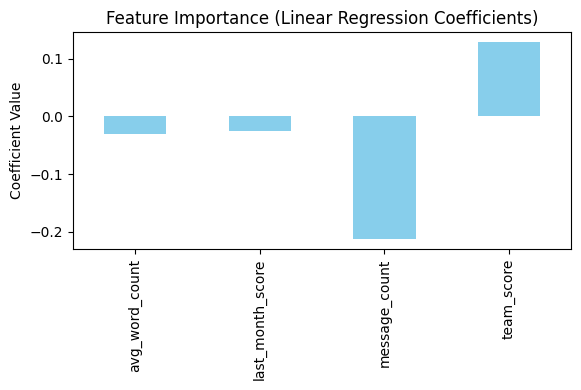

In [20]:
# Model performance visualization

# Scatter plot: True vs Predicted Sentiment Score
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("True vs Predicted Monthly Sentiment Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()

# Feature importance bar plot
plt.figure(figsize=(6, 4))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

#### Model Results Analysis

- **R-squared: 0.108**  
  The R-squared value is very low, indicating that the linear regression model explains only about 10.8% of the variance in the monthly sentiment scores. This means the model has limited predictive power and most of the variation in sentiment scores cannot be captured by the selected features.

- **Mean Squared Error: 7.467**  
  The MSE is relatively high compared to the typical range of sentiment scores, suggesting that the predictions are not very close to the actual values.

- **Feature Coefficients:**  
  - `avg_word_count`: -0.031  
  - `last_month_score`: -0.025  
  - `message_count`: -0.213  
  - `team_score`: 0.129  

  The coefficients are all quite small, further indicating that none of the features have a strong linear relationship with the target variable.

**Conclusion:**  
I tried several different feature engineering approaches, but none produced a strong model for predicting monthly sentiment scores. Therefore, I ultimately selected a combination of features that I believe are reasonable and relatively independent. However, the model's poor performance is understandable for several reasons:

1. **Significant Reduction in Data Volume:**  
   When the dataset is aggregated to monthly scores per employee, the number of training samples drops sharply, resulting in insufficient data for effective model training.

2. **Limited Feature Information:**  
   The original dataset contains very few features. Predicting an employee's monthly sentiment score based on limited email information is inherently difficult.

Other possible reasons include noise in the sentiment labeling process and the possibility that the relationship between features and sentiment scores is non-linear. Overall, the current feature set and data structure may not be sufficient for accurate monthly sentiment prediction.